## Preparing the data 

In [43]:
fh = open('place.txt', 'r')
long = []
lat = []
for line in fh.readlines():
    nums = line.split(',')
    nums[1] = nums[1].split('\n')[0]
    long.append(nums[0])
    lat.append(nums[1])

In [44]:
print(len(long))
print(len(lat))
print(long[:5])
print(lat[:5])

300
300
['-112.0707922', '-112.0655423', '-112.0739312', '-112.0748658', '-80.5256905']
['33.4516246', '33.4492979', '33.4564905', '33.4701155', '43.4770992']


In [45]:
data = {'longitude' : long,
       'latitude' : lat}

In [46]:
import pandas as pd
df = pd.DataFrame(data, columns = ['longitude', 'latitude'])

In [47]:
df.head(10)

,longitude,latitude
0,-112.0707922,33.4516246
1,-112.0655423,33.4492979
2,-112.0739312,33.4564905
3,-112.0748658,33.4701155
4,-80.5256905,43.4770992
5,-80.5266413,43.4858748
6,-80.846495,35.225825
7,-112.0744277,33.4484911
8,-112.0731006,33.4299067
9,-80.8396357,35.2270542


In [48]:
df.shape

(300, 2)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   longitude  300 non-null    object
 1   latitude   300 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


## Using the elbow method to assert the best value of k

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

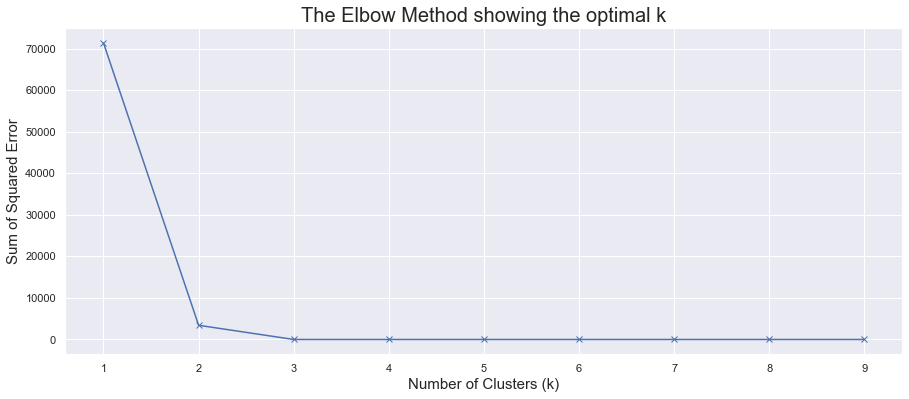

In [51]:
sse = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    sse.append(kmeanModel.inertia_)
plt.figure(figsize=(15,6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (k)', fontsize = 15)
plt.ylabel('Sum of Squared Error', fontsize = 15)
plt.title('The Elbow Method showing the optimal k', fontsize = 20)
plt.show()

- We see that the SSE rapidly decreases from k = 1 to k = 2, and there is a slight decrease to k = 3
- Thus, we use k = 3. k = 2 will also give similar results. 
- However, taking more than 3 clusters will not increase the performance. 

## Calculating the Silhoutte Score

In [68]:
from sklearn.metrics import silhouette_score

In [70]:
X = df[['latitude', 'longitude']]
y = df['cluster_label']
print("Clusters\tSilhoutte Score\n")
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("k = {} \t--> \t{}".format(n_cluster, sil_coeff))

Clusters	Silhoutte Score

k = 2 	--> 	0.9134294191976036
k = 3 	--> 	0.9976417270188832
k = 4 	--> 	0.9510927552691321
k = 5 	--> 	0.95326134788847
k = 6 	--> 	0.9483739748051011
k = 7 	--> 	0.8069492286923069
k = 8 	--> 	0.8035946155229753
k = 9 	--> 	0.6690696167168573
k = 10 	--> 	0.6126719564646254


As k = 3 gives the highest Silhoutte Score, we use cluster our data into 3 clusters. 

## Using K Means for Clustering (k=3)

We use k-means++ to use smart initialisation of cluster centers

In [79]:
kmeans = KMeans(n_clusters = 3, init ='k-means++', verbose = 1) 

In [80]:
kmeans.fit(df) 

Initialization complete
Iteration 0, inertia 0.30640499810179117
Converged at iteration 0: center shift 0.0004883701986633395 within tolerance 0.007954989148209293.
Initialization complete
Iteration 0, inertia 0.28296707929350284
Converged at iteration 0: center shift 0.00025399101058046263 within tolerance 0.007954989148209293.
Initialization complete
Iteration 0, inertia 0.27084550621692005
Converged at iteration 0: center shift 0.0001327752798145978 within tolerance 0.007954989148209293.
Initialization complete
Iteration 0, inertia 0.28367477567654786
Converged at iteration 0: center shift 0.0002610679744108809 within tolerance 0.007954989148209293.
Initialization complete
Iteration 0, inertia 0.4052890994276542
Converged at iteration 0: center shift 0.0014772112119219272 within tolerance 0.007954989148209293.
Initialization complete
Iteration 0, inertia 0.2755446205742849
Converged at iteration 0: center shift 0.0001797664233882581 within tolerance 0.007954989148209293.
Initializat

KMeans(n_clusters=3, verbose=1)

In [54]:
df['cluster_label'] = kmeans.fit_predict(df)

In [55]:
df.head(10)

,longitude,latitude,cluster_label
0,-112.0707922,33.4516246,1
1,-112.0655423,33.4492979,1
2,-112.0739312,33.4564905,1
3,-112.0748658,33.4701155,1
4,-80.5256905,43.4770992,2
5,-80.5266413,43.4858748,2
6,-80.846495,35.225825,0
7,-112.0744277,33.4484911,1
8,-112.0731006,33.4299067,1
9,-80.8396357,35.2270542,0


In [56]:
print("Locations of centers of the clusters: ")
centers = kmeans.cluster_centers_ 
centers

Locations of centers of the clusters: 


array([[ -80.84422658,   35.21709692],
       [-112.07160642,   33.46049013],
       [ -80.52837166,   43.47624848]])

In [87]:
print("There are 100 locations in each cluster")
df['cluster_label'].value_counts()

There are 100 locations in each cluster


(300,)

In [89]:
print("Number of rows in Cluster-labels: ", df['cluster_label'].shape)

Number of rows in Cluster-labels:  (300,)


In [90]:
df['cluster_label'].to_csv('clusters.csv')